In [ ]:
#IMPORTED LIBRARIES FOR HANDLING AND GENERATING THE FAKE RANDOM DATAFRAME
import pandas as pd
import random
from faker import Faker
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity


In [6]:
#GENERATED THE FAKE DATA USING FAKER LIBRARIES
fake = Faker()
num_records = 1000  

customers = [f'CUST{str(i).zfill(4)}' for i in range(1, 101)]  
products = [f'PROD{str(i).zfill(4)}' for i in range(1, 51)]  
interaction_types = ['purchased', 'viewed', 'clicked','Added to Cart']

data = []
for _ in range(num_records):
    customer_id = random.choice(customers)
    product_id = random.choice(products)
    interaction_type = random.choice(interaction_types)
    interaction_date = fake.date_between(start_date='-1y', end_date='today')  
    
    data.append({
        'customer_id': customer_id,
        'product_id': product_id,
        'interaction_type': interaction_type,
        'interaction_date': interaction_date
    })

df = pd.DataFrame(data)

In [7]:
df.to_csv("project_data.csv",index=False)

In [3]:
df = pd.read_csv(r"D:\1 DS PROJECTS\DS final project 1\project_data.csv")

In [4]:
#DISPLAY THE DATAFRAME
df.head()

,customer_id,product_id,interaction_type,interaction_date
0,CUST0093,PROD0035,viewed,2025-01-30
1,CUST0017,PROD0049,purchased,2024-07-24
2,CUST0090,PROD0042,Added to Cart,2024-04-18
3,CUST0046,PROD0032,clicked,2024-05-09
4,CUST0093,PROD0006,Added to Cart,2024-07-28


In [5]:
#MAPPING THE SCORE TO THE DATAFRAME BASED ON INTERACTION TYPE
interaction_mapping = {'purchased': 4,'Added to Cart':3 ,'viewed': 2, 'clicked': 1}
df['interaction_score'] = df['interaction_type'].map(interaction_mapping)

In [ ]:
#CHECKING THE NULL VALUES
df.isna().sum()

In [ ]:
#CHECKING THE DUPLICATED VALUE
df.duplicated().sum()

In [8]:
#DISPLAY THE DATAFRAME AFTER MAPPING 
df.head()

,customer_id,product_id,interaction_type,interaction_date,interaction_score
0,CUST0093,PROD0035,viewed,2025-01-30,2
1,CUST0017,PROD0049,purchased,2024-07-24,4
2,CUST0090,PROD0042,Added to Cart,2024-04-18,3
3,CUST0046,PROD0032,clicked,2024-05-09,1
4,CUST0093,PROD0006,Added to Cart,2024-07-28,3


In [9]:
#IMPORTED LIBARIES FOR EDA AND CHECK OUTLIER
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

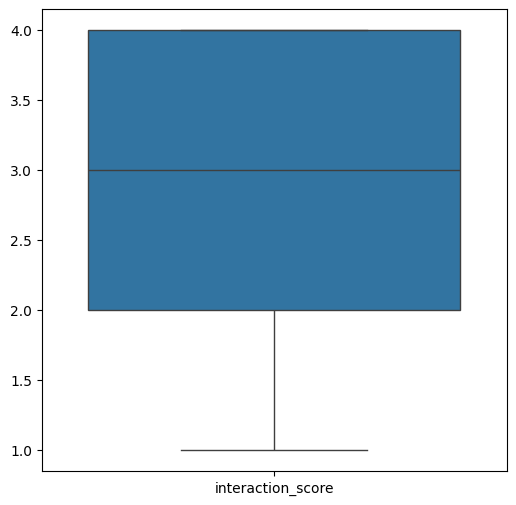

In [10]:
#CHECKING THE OUTLIER
plt.figure(figsize=(6,6))
sns.boxplot(data=df)

<Axes: xlabel='interaction_type', ylabel='count'>

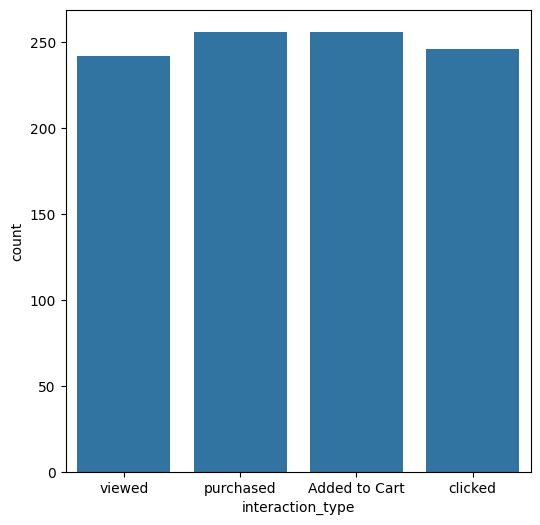

In [ ]:
#check the interaction type
plt.figure(figsize=(6,6))
sns.countplot(x ="interaction_type",data = df)

In [12]:
#CREATING THE PIVOT TABLE FOR TRAINING
interaction_matrix = df.pivot_table(index='customer_id', columns='product_id', values='interaction_score', aggfunc='sum', fill_value=0)

In [13]:
#DISPLAY THE PIVOT TABLE
interaction_matrix

product_id,PROD0001,PROD0002,PROD0003,PROD0004,PROD0005,PROD0006,PROD0007,PROD0008,PROD0009,PROD0010,...,PROD0041,PROD0042,PROD0043,PROD0044,PROD0045,PROD0046,PROD0047,PROD0048,PROD0049,PROD0050
customer_id,,,,,,,,,,,,,,,,,,,,,
CUST0001,0,4,0,0,0,0,0,0,0,0,...,0,0,0,4,0,3,0,0,3,1
CUST0002,0,0,0,1,7,0,2,0,0,0,...,0,0,2,0,0,0,0,3,2,0
CUST0003,0,1,0,8,2,0,0,3,2,0,...,0,0,0,0,0,0,0,3,0,0
CUST0004,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CUST0005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUST0096,0,5,3,0,3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
CUST0097,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
CUST0098,1,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [11]:
#REPLACE THE VALUE 0 WITH 0.01
interaction_matrix = interaction_matrix.replace(0, 0.01) 

In [12]:
#IMPORT CSR MATRIX TO HANDLE THE SPARSE DATA
from scipy.sparse import csr_matrix

In [13]:
#HANDLING THE SPARSE DATA
interaction_matrix_sparse = csr_matrix(interaction_matrix)

In [ ]:
#doing the dimensionality reduction using svd
svd = TruncatedSVD(n_components=50, random_state=42)
svd_matrix = svd.fit_transform(interaction_matrix_sparse)

In [ ]:
#USED COSINE WHICH IS COLLABERATIVE FILTERING WHO ARE SIMILAR USER
svd_similarity = cosine_similarity(svd_matrix)
svd_similarity_df = pd.DataFrame(svd_similarity, index=interaction_matrix.index, columns=interaction_matrix.index)

In [16]:
#DISPLAY THE DATAFRAME 
svd_similarity_df

customer_id,CUST0001,CUST0002,CUST0003,CUST0004,CUST0005,CUST0006,CUST0007,CUST0008,CUST0009,CUST0010,...,CUST0091,CUST0092,CUST0093,CUST0094,CUST0095,CUST0096,CUST0097,CUST0098,CUST0099,CUST0100
customer_id,,,,,,,,,,,,,,,,,,,,,
CUST0001,1.000000,0.078658,0.213265,0.238712,0.035371,0.326214,0.298104,0.115709,0.009854,0.157568,...,0.159862,0.182186,0.305092,0.253428,0.005632,0.352795,0.055663,0.085933,0.131215,0.198665
CUST0002,0.078658,1.000000,0.198741,0.031670,0.109620,0.147118,0.207624,0.019799,0.141179,0.173562,...,0.235207,0.115357,0.285076,0.075215,0.212951,0.210551,0.247106,0.246661,0.161227,0.310589
CUST0003,0.213265,0.198741,1.000000,0.186022,0.007077,0.005295,0.005399,0.006803,0.049822,0.262004,...,0.005351,0.075141,0.030586,0.298877,0.155892,0.115050,0.034569,0.182120,0.005398,0.313616
CUST0004,0.238712,0.031670,0.186022,1.000000,0.006447,0.044016,0.026370,0.057803,0.370454,0.116479,...,0.083839,0.055553,0.160344,0.057724,0.107107,0.037519,0.004460,0.184263,0.197526,0.196313
CUST0005,0.035371,0.109620,0.007077,0.006447,1.000000,0.081436,0.208798,0.073567,0.010485,0.251964,...,0.119561,0.055222,0.248882,0.157032,0.007615,0.008080,0.328693,0.200055,0.007980,0.007655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CUST0096,0.352795,0.210551,0.115050,0.037519,0.008080,0.108327,0.229800,0.188385,0.009373,0.092159,...,0.189683,0.093641,0.091225,0.518790,0.029496,1.000000,0.203606,0.006606,0.118044,0.205117
CUST0097,0.055663,0.247106,0.034569,0.004460,0.328693,0.312717,0.210374,0.111916,0.008433,0.093788,...,0.220873,0.268825,0.164787,0.274125,0.111918,0.203606,1.000000,0.518422,0.154875,0.005048
CUST0098,0.085933,0.246661,0.182120,0.184263,0.200055,0.206739,0.064655,0.148520,0.009165,0.221670,...,0.060242,0.280772,0.031592,0.199038,0.368720,0.006606,0.518422,1.000000,0.255229,0.045027


In [17]:
# FUNCTION TO RECOMMEND PRODUCTS USING SVD-BASED SIMILARITY FOR A GIVEN USER
def recommend_products_svd(user_id, num_recommendations=5):
    if user_id not in interaction_matrix.index:
        return f"User {user_id} not found in dataset."

    similar_users = svd_similarity_df[user_id].sort_values(ascending=False).iloc[1:].index

    similar_users_interactions = interaction_matrix.loc[similar_users]

    product_scores = similar_users_interactions.sum().sort_values(ascending=False)

    user_interactions = set(interaction_matrix.loc[user_id][interaction_matrix.loc[user_id] > 0].index)

    recommendations = [prod for prod in product_scores.index if prod not in user_interactions][:num_recommendations]

    return recommendations if recommendations else "No new recommendations available."

In [27]:
#IMPORTED JOBLIB AND SAVED THE MODEL USING JOBLIB
import joblib

joblib.dump(svd,r"D:\1 DS PROJECTS\DS final project 1\save files.pkl")



['D:\\1 DS PROJECTS\\DS final project 1\\save files.pkl']

In [29]:

joblib.dump(interaction_matrix,r"D:\1 DS PROJECTS\DS final project 1\INTRACTION SAVE FILE.pkl")

['D:\\1 DS PROJECTS\\DS final project 1\\INTRACTION SAVE FILE.pkl']

In [30]:

joblib.dump(svd_similarity_df,r"D:\1 DS PROJECTS\DS final project 1\SVD SAVE FILE.pkl")

['D:\\1 DS PROJECTS\\DS final project 1\\SVD SAVE FILE.pkl']

In [ ]:
# RECOMMEND PRODUCTS FOR A GIVEN USER BASED ON SVD SIMILARITY 
user_id = "CUST0001"
recommended_products_svd = recommend_products_svd(user_id)
print(f"Recommended products for User {user_id} with SVD: {recommended_products_svd}")

In [ ]:
# Function to calculate precision at K
def precision_at_k(actual, predicted, k=5):
    return sum(1 for x in predicted[:k] if x in actual) / k

def recall_at_k(actual, predicted, k=5):
    return sum(1 for x in predicted[:k] if x in actual) / len(actual) if actual else 0

actual = ['PROD001', 'PROD002', 'PROD003']
predicted = ['PROD002', 'PROD003', 'PROD004']

precision = precision_at_k(actual, predicted, k=3)
recall = recall_at_k(actual, predicted, k=3)

precision_rounded = round(precision, 1)
recall_rounded = round(recall, 1)
print(f"Precision@K: {precision_rounded }")
print(f"Recall@K: {recall_rounded}")

Precision@K: 0.8
Recall@K: 0.8
